## Exercício 6: Filtro Passa-Banda

6. Além dos filtros passa-baixa e passa-alta, também existe o filtro passa-banda? Explique seu funcionamento e aplique um filtro passa-banda na imagem.

### Importando bibliotecas

In [22]:
import numpy as np
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [23]:
img_sinc_org_menor = cv2.imread('./imgs/sinc_original_menor.tif', 0)
img_sinc_org = cv2.imread('./imgs/sinc_original.png', 0)
img_sinc_rot = cv2.imread('./imgs/sinc_rot.png', 0)
img_sinc_rot2 = cv2.imread('./imgs/sinc_rot2.png', 0)
img_sinc_trans = cv2.imread('./imgs/sinc_trans.png', 0)

imgs = [ img_sinc_org_menor, img_sinc_org, img_sinc_rot, img_sinc_rot2, img_sinc_trans ]

In [24]:

def ideal_bandpass_filter(D0_low, D0_high, img_shape):
    rows, cols = img_shape[:2]
    center = (rows / 2, cols / 2)
    # Inicialize uma matriz com todos os valores iguais a 0 (bloqueio máximo)
    bandpass_filter = np.zeros(img_shape[:2])
    for x in range(cols):
        for y in range(rows):
            # Calcule a distância do ponto ao centro da imagem
            dist = distance((y, x), center)
            # Defina o valor do filtro como 1 se estiver dentro do intervalo [D0_low, D0_high]
            if D0_low <= dist <= D0_high:
                bandpass_filter[y, x] = 1
                
    return bandpass_filter

def butterworth_bandpass_filter(D0_low, D0_high, img_shape, n):
    rows, cols = img_shape[:2]
    center = (rows / 2, cols / 2)
    # Inicialize uma matriz com todos os valores iguais a 0 (bloqueio máximo)
    bandpass_filter = np.zeros(img_shape[:2])
    for x in range(cols):
        for y in range(rows):
            # Calcule a distância do ponto ao centro da imagem
            dist = distance((y, x), center)
            # Defina o valor do filtro de acordo com a função de Butterworth se estiver dentro do intervalo [D0_low, D0_high]
            if D0_low <= dist <= D0_high:
                bandpass_filter[y, x] = 1 / (1 + ((dist * dist) / (D0_high * D0_low))**n)
            
    return bandpass_filter

def gaussian_bandpass_filter(D0_low, D0_high, img_shape):
    rows, cols = img_shape[:2]
    center = (rows / 2, cols / 2)
    # Inicialize uma matriz com todos os valores iguais a 0 (bloqueio máximo)
    bandpass_filter = np.zeros(img_shape[:2])
    for x in range(cols):
        for y in range(rows):
            # Calcule a distância do ponto ao centro da imagem
            dist = distance((y, x), center)
            # Defina o valor do filtro de acordo com a função Gaussiana se estiver dentro do intervalo [D0_low, D0_high]
            if D0_low <= dist <= D0_high:
                bandpass_filter[y, x] = np.exp(-((dist * dist) / (2 * D0_low * D0_high)))
            
    return bandpass_filter

def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

BAND PASS FILTERS
IDEAL


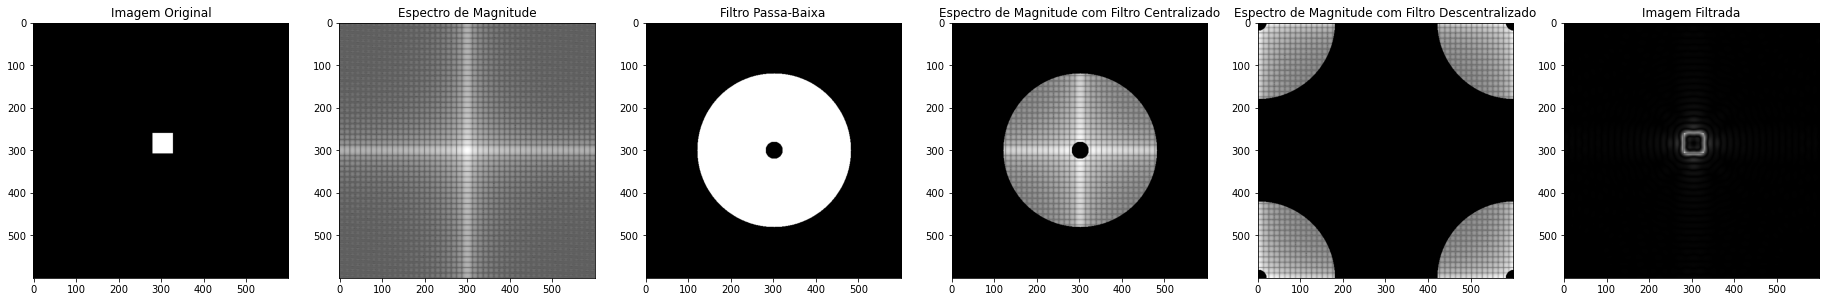

BUTTERWORTH


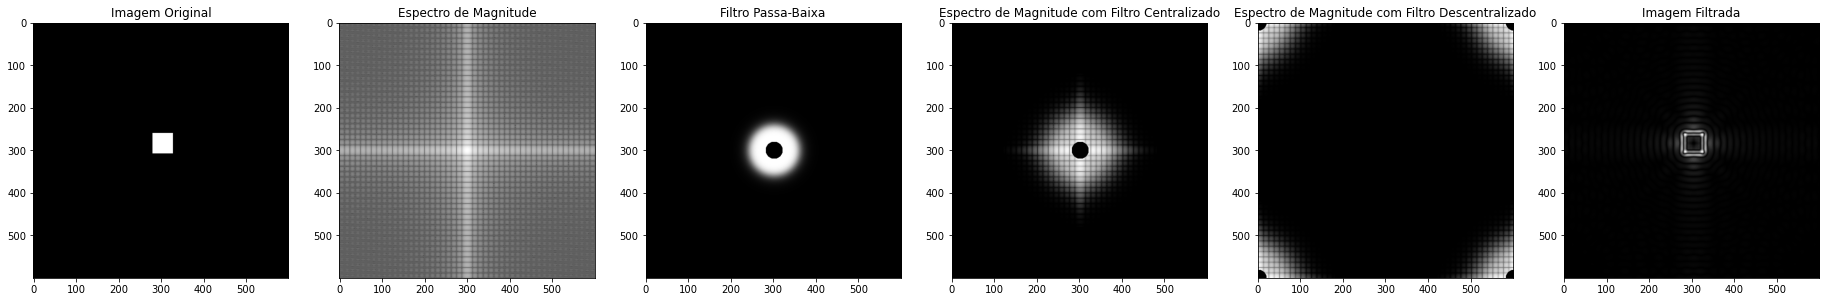

GAUSSIAN


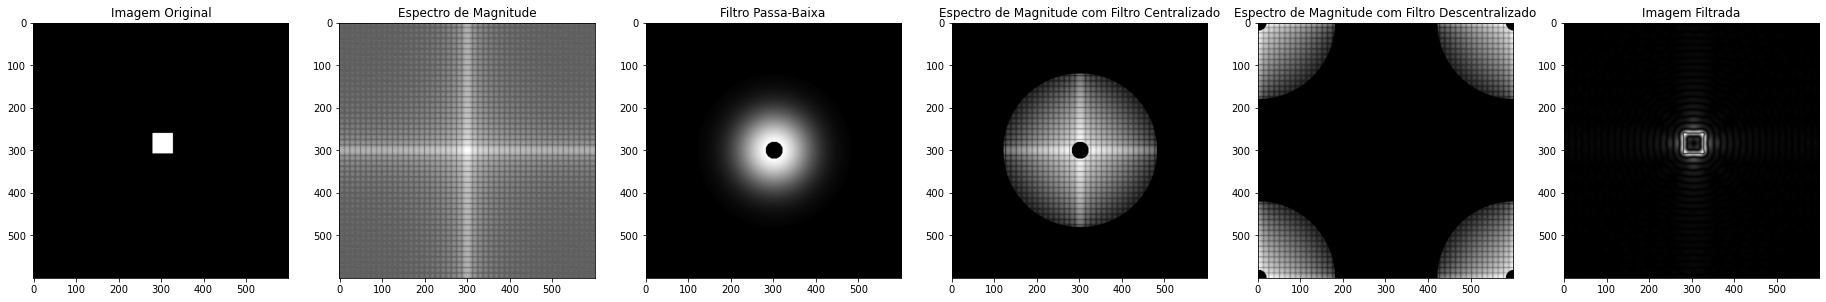

IDEAL


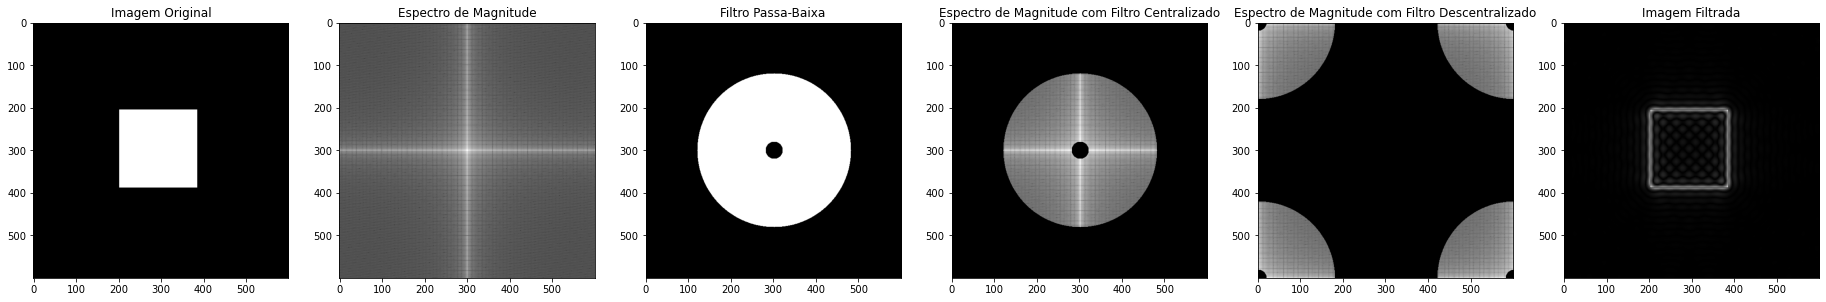

BUTTERWORTH


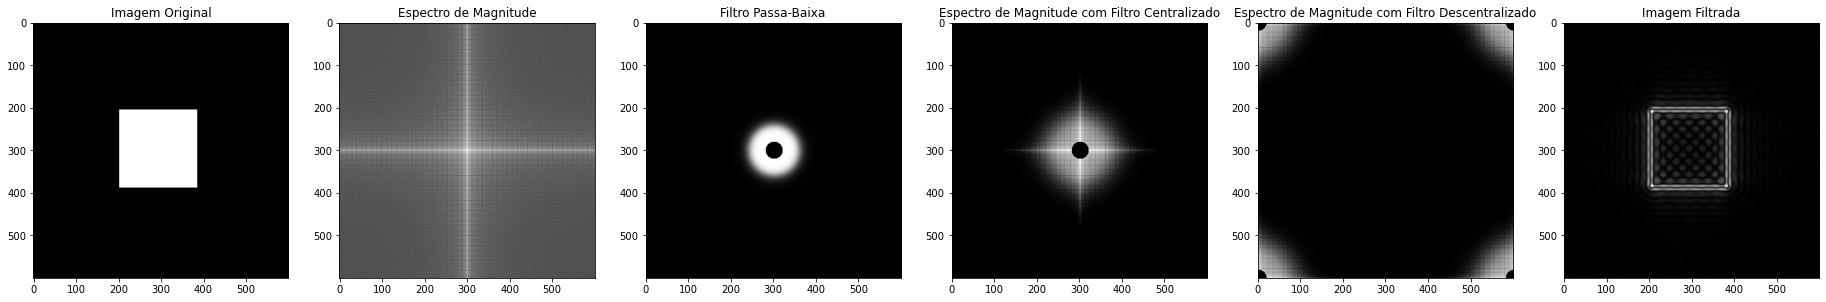

GAUSSIAN


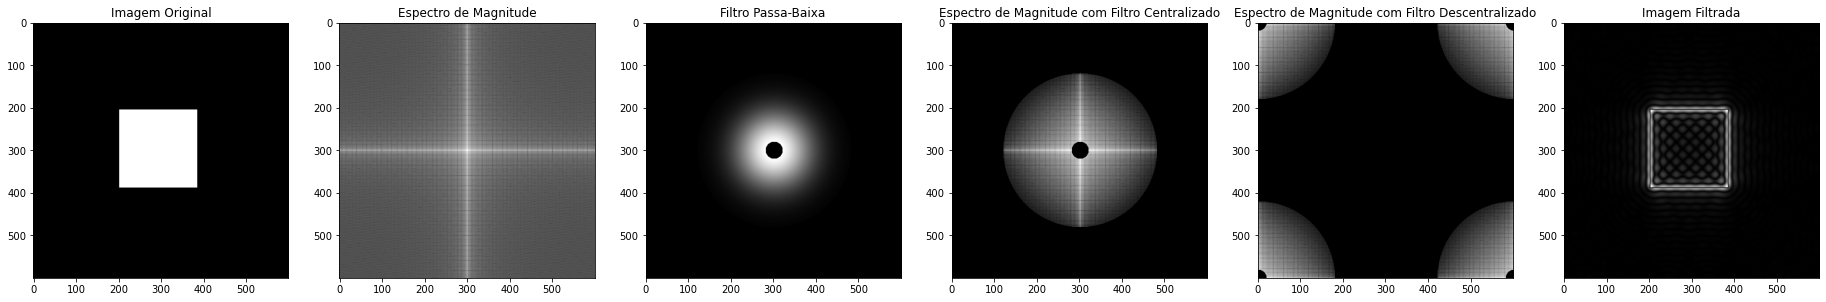

IDEAL


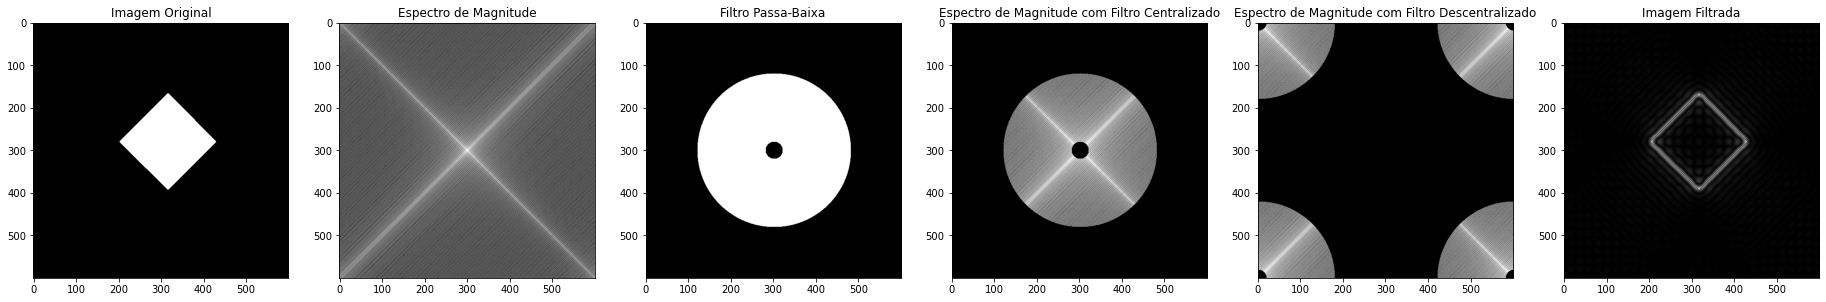

BUTTERWORTH


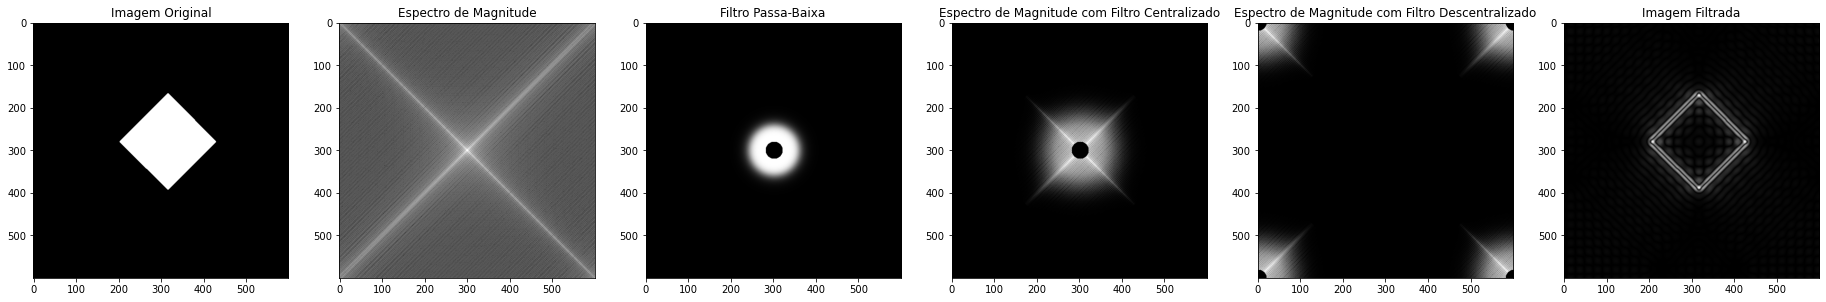

GAUSSIAN


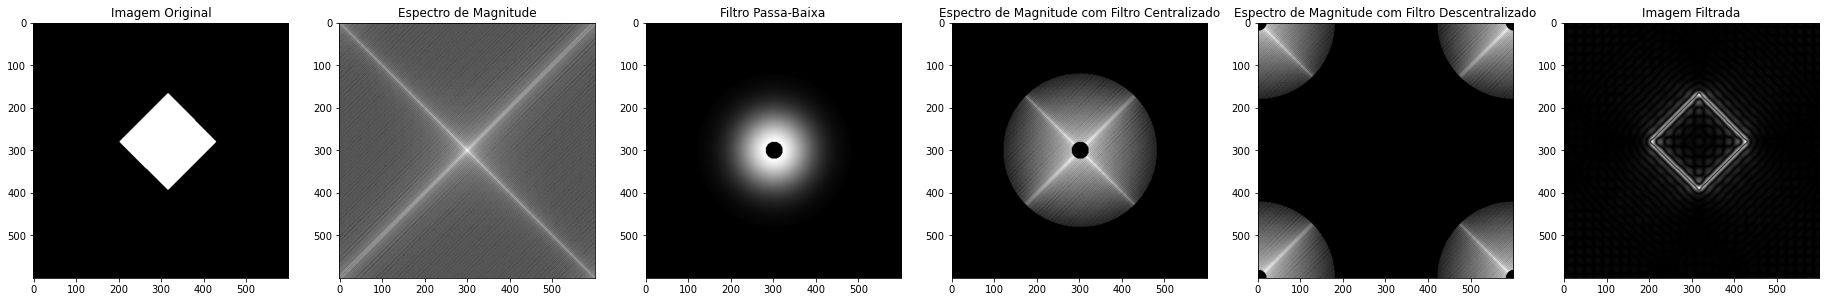

IDEAL


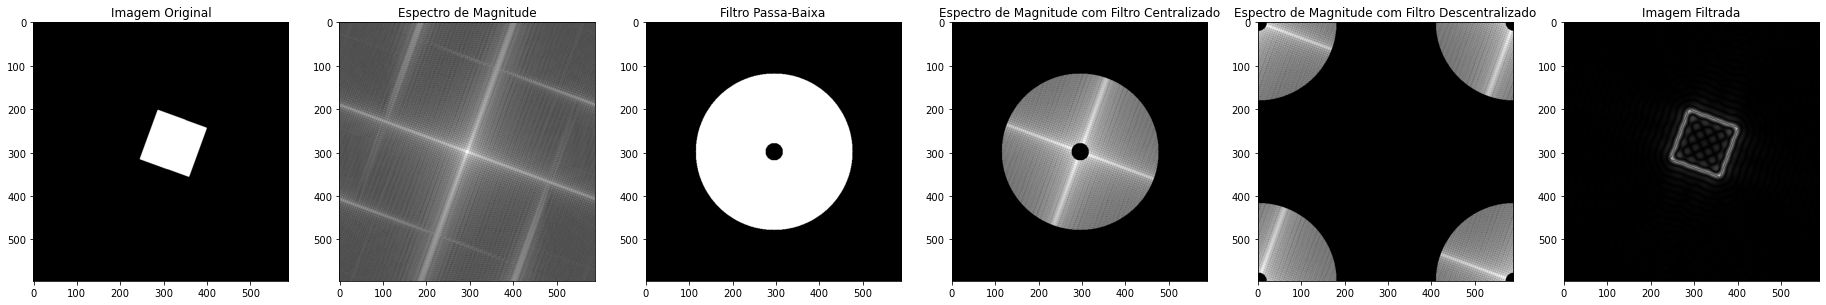

BUTTERWORTH


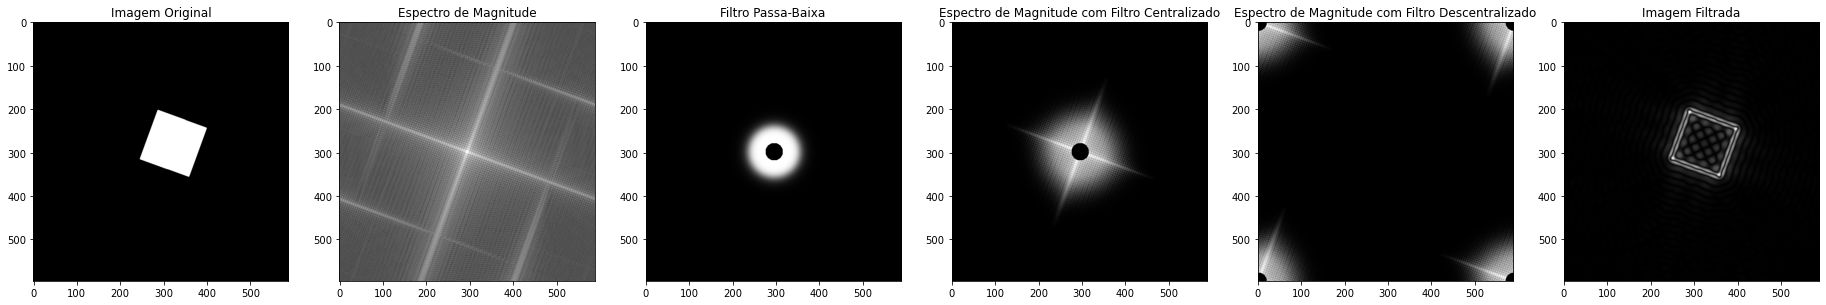

GAUSSIAN


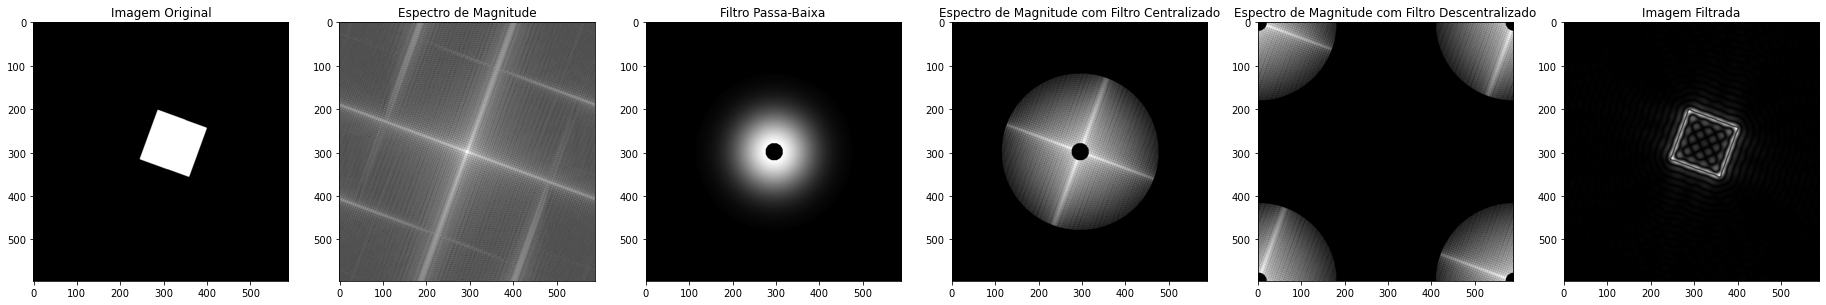

IDEAL


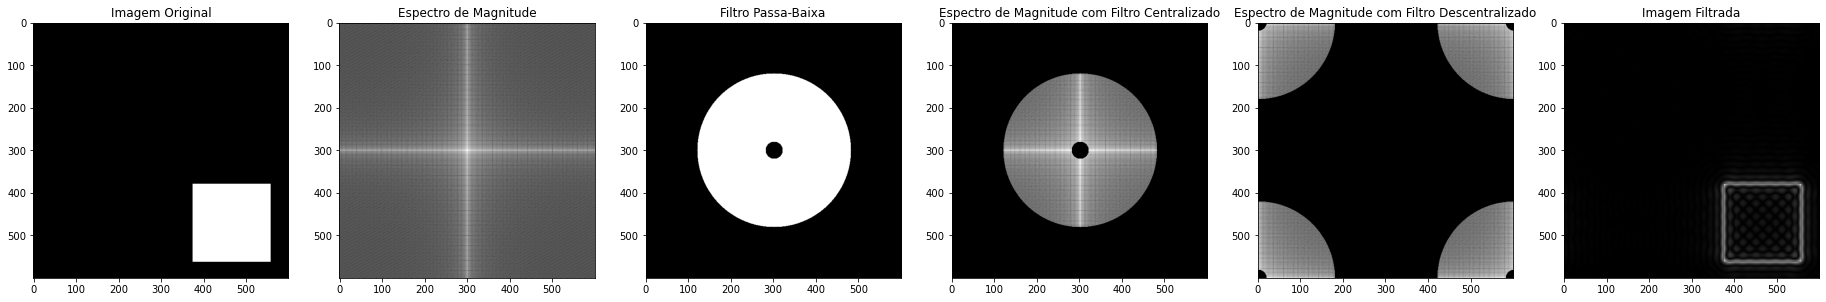

BUTTERWORTH


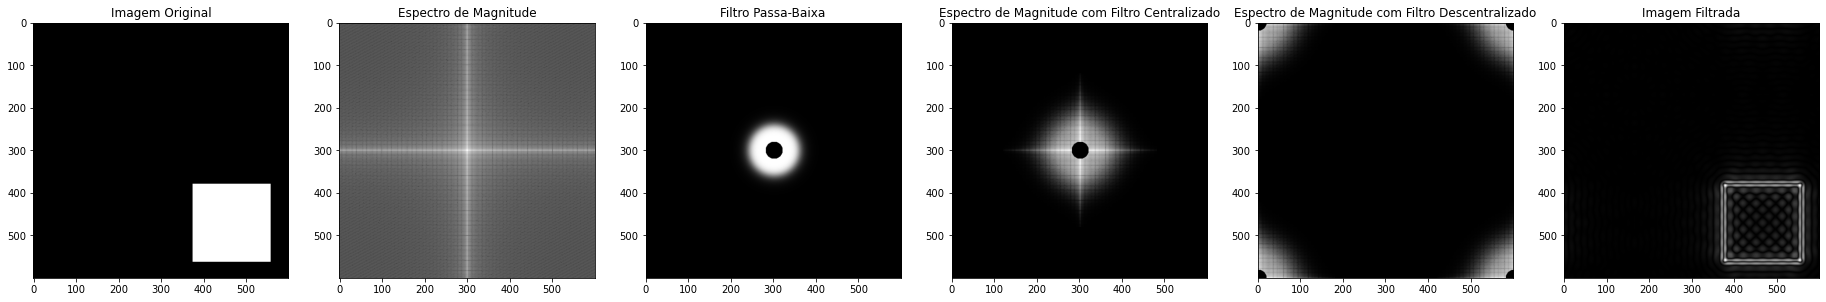

GAUSSIAN


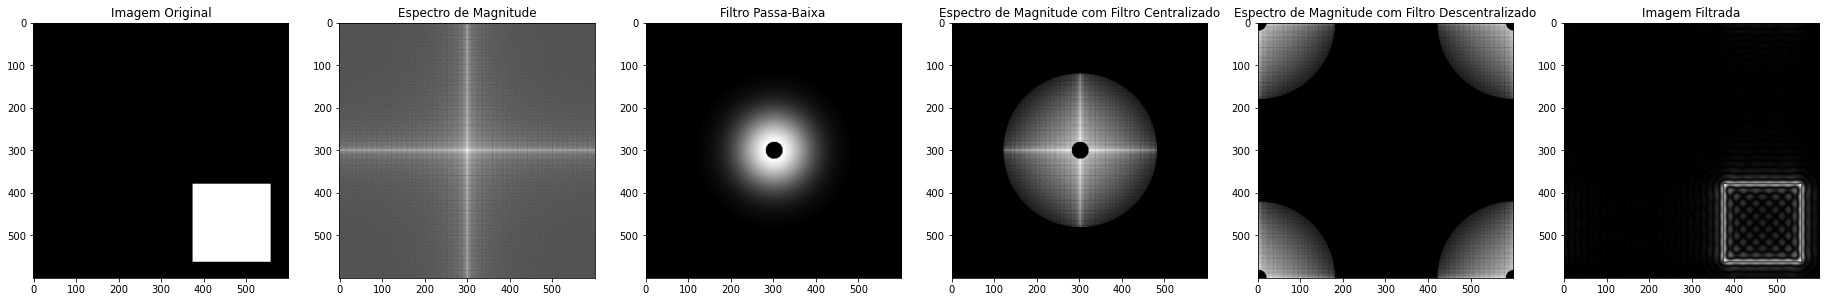

In [26]:
def apply_bandpass_filter(img, variance=False, function=ideal_bandpass_filter, D0_low=80, D0_high=100, order=2, title='Low Pass Filter'):
    original = np.fft.fft2(img)
    center = np.fft.fftshift(original)
    
    plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
    plt.subplots_adjust(wspace=0.2, hspace=0.01)
    
    plt.subplot(1,6,1),plt.imshow(img, cmap='gray'), plt.title('Imagem Original')
    
    magnitude_spectrum = 20*np.log(np.abs(center)+1)
    plt.subplot(1,6,2), plt.imshow( magnitude_spectrum , cmap='gray'), plt.title('Espectro de Magnitude')
    
    if function == butterworth_bandpass_filter:
        # D0 = min(img.shape)/D0
        lowpass_filter = function(D0_low, D0_high, img.shape, order)
        lowpass_filter_centered = center * function(D0_low, D0_high, img.shape, order)
    else:
        lowpass_filter = function(D0_low, D0_high, img.shape)
        lowpass_filter_centered = center * function(D0_low, D0_high, img.shape)
        
    plt.subplot(1,6,3), plt.imshow( np.abs(lowpass_filter) , cmap='gray'), plt.title('Filtro Passa-Baixa')

    plt.subplot(1,6,4), plt.imshow( 20*np.log(np.abs(lowpass_filter_centered)+1) , cmap='gray'), plt.title('Espectro de Magnitude com Filtro Centralizado')
     
    lowpass_filter_decentered = np.fft.ifftshift(lowpass_filter_centered)
    plt.subplot(1,6,5), plt.imshow( 20*np.log(np.abs(lowpass_filter_decentered)+1) , cmap='gray'), plt.title('Espectro de Magnitude com Filtro Descentralizado')
    
    inverse = np.fft.ifft2(lowpass_filter_decentered)
    plt.subplot(1,6,6), plt.imshow( np.abs(inverse) , cmap='gray'), plt.title('Imagem Filtrada')
    
    plt.show()
    

D0_low = 20
D0_high = 180

print("BAND PASS FILTERS")
for i in imgs:
    print("IDEAL")
    apply_bandpass_filter(i, function=ideal_bandpass_filter, D0_low=D0_low, D0_high=D0_high)
    print("BUTTERWORTH")
    apply_bandpass_filter(i, function=butterworth_bandpass_filter, order=5, D0_low=D0_low, D0_high=D0_high)
    print("GAUSSIAN")
    apply_bandpass_filter(i, function=gaussian_bandpass_filter, D0_low=D0_low, D0_high=D0_high)

O filtro passa-banda é um tipo de filtro que permite a passagem de frequências dentro de uma faixa específica de frequência enquanto atenua as frequências fora dessa faixa. Ele é útil para realçar ou destacar componentes de frequência em uma imagem que estão dentro de um intervalo de frequência específico, enquanto suprime frequências mais altas e mais baixas.

Aqui está uma explicação de como o filtro passa-banda funciona:

1. **Definição da Faixa de Frequência**: Você especifica a faixa de frequência desejada que deseja manter na imagem. Esta faixa é geralmente definida por dois valores, D0_low e D0_high, que representam as frequências de corte inferior e superior, respectivamente.

2. **Cálculo do Filtro**: O filtro passa-banda é calculado de forma a preservar as frequências na faixa definida (entre D0_low e D0_high) e atenuar as frequências fora dessa faixa.

3. **Aplicação do Filtro**: O filtro é aplicado no domínio da frequência da imagem, multiplicando-o pelo espectro de frequência da imagem original.

4. **Transformação Inversa**: A transformada inversa de Fourier é aplicada ao resultado para obter a imagem filtrada no domínio espacial.
